# Demo Globygon

## Calculating the center-of-mass for the points

1. Convert each coordinate in RA $(\alpha_{\rm i})$/Dec $(\delta_{\rm i})$ to $x_{\rm i}$, $y_{\rm i}$, and $z_{\rm i}$ Cartesian coordinates: <br>
$$ 
x_{\rm i} = \cos\left( \delta_{\rm i} \right) \cos \left( \alpha_{\rm i} \right), \\ 
y_{\rm i} = \cos\left( \delta_{\rm i}  \right) \sin \left( \alpha_{\rm i} \right), \\
z_{\rm i} = \sin\left( \delta_{\rm i}  \right)
$$
2. Calculate the center-of-mass using the Cartesian coordinates, of which there are $N$ points:
$$
\langle x \rangle = \sum_{\rm i}^{\rm N} x_{\rm i}/N.
$$
3. Convert the $\langle x \rangle$/$\langle y \rangle$/$\langle z \rangle$ back into polar coordinates:
$$
\langle \delta \rangle = \sin^{-1} \left( \langle z \rangle / R \right) \\
\langle \alpha \rangle = \tan^{-1} \left( \langle x \rangle/\langle y \rangle \right), 
$$
where $R$ is given by $R = \sqrt{ \langle x \rangle^2 + \langle y \rangle^2 + \langle z \rangle^2 }$.

(0.579035274150633, -0.5450611401949198)


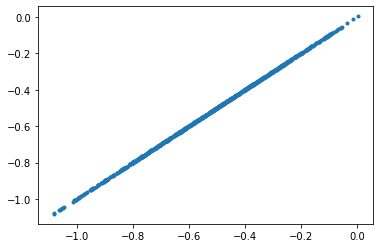

In [1]:
import numpy as np
from globygon import globygon as gb
import matplotlib.pyplot as plt 
degtorad = np.pi/180.

filename = "easysurvey.txt"
data = np.genfromtxt(filename, names=['ID', 'RA', 'DEC'], delimiter=' ')

index = 0
example_RA = data['RA']*degtorad
example_Dec = data['DEC']*degtorad

excat = gb.Catalog(example_RA,example_Dec)

x, y, z = excat._convert_RADec_to_Cartesian()
ra, dec = excat._convert_Cartesian_to_RADec(x, y, z)

plt.plot(example_Dec, dec, marker='.', ls='')

com = excat.calculate_center_of_mass()
print(com)

In [2]:
# Demo/test the distances function too
dists = excat.calculate_dist_from_com()
print(dists.mean(),dists.std())
mask = dists<0.15
print(mask.sum())

# Now for an arbitrary point
point = [40.*degtorad,-13.*degtorad]
dists = excat.calculate_dist_from_com(point)
mask2 = dists<0.12
print(mask2.sum())

0.3187128086263735 0.11724615343946497
73
53


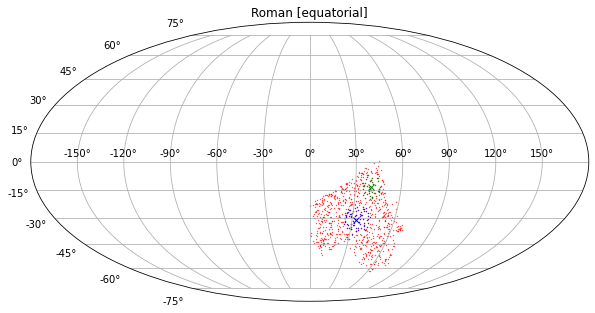

In [3]:
# Plot again to check
fig2 = plt.figure(figsize=[10,7])
ax1 = fig2.add_subplot(111, projection="mollweide")

ax1.scatter(example_RA,example_Dec,s=0.1,c='r') # pointings
ax1.scatter(example_RA[mask],example_Dec[mask],s=0.1,c='b')
ax1.scatter(example_RA[mask2],example_Dec[mask2],s=0.1,c='g')
ax1.plot(com[0],com[1],'bx')
ax1.plot(point[0],point[1],'gx')

plt.title("Roman [equatorial]")
plt.grid(True)

plt.show()

1.5707963267948966 0.8676046802878152
distances from com             (blue x) = [0.51213359 0.51213359 0.46134112 0.31272421]
distances from average ra/dec (green x) = [0.54802841 0.54802841 0.39269908 0.39269908]


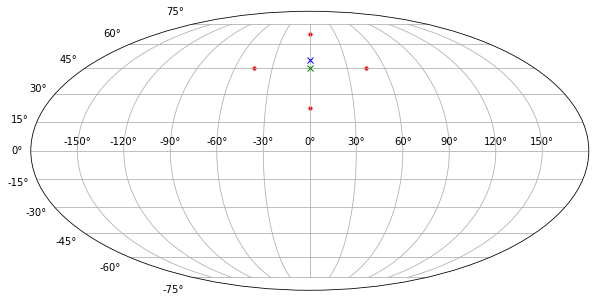

In [4]:
# Plot again to check
fig2 = plt.figure(figsize=[10,7])
ax1 = fig2.add_subplot(111, projection="mollweide")

example2_RA = np.array([-np.pi/4., np.pi/4., 0., 0.,]) #example_RA = np.array([0., 0.,])
example2_Dec = np.array([0., 0., -np.pi/8., np.pi/8.]) + np.pi/4. # example_Dec = np.array([-np.pi/8., np.pi/8.]) + np.pi/4.

ex2cat = gb.Catalog(example2_RA,example2_Dec)
com2 = ex2cat.calculate_center_of_mass()
point = [0,np.pi/4] # average RA/Dec

ax1.scatter(example2_RA, example2_Dec,s=10,c='r') # pointings
ax1.plot(com2[0],com2[1],'bx')
ax1.plot(point[0],point[1],'gx')

print(np.pi/2., com2[1])

print('distances from com             (blue x) =',ex2cat.calculate_dist_from_com())
print('distances from average ra/dec (green x) =',ex2cat.calculate_dist_from_com(point))

plt.grid(True)
plt.show()

Brian Jackson & Dida Markovic, 2021